# Fashion Boutique Dataset Analysis

## Introduction
This notebook analyzes the Fashion Boutique dataset to extract insights into product performance, pricing strategies, and customer behavior. The analysis covers exploratory data analysis, visualizations, and key findings that can help in making data-driven decisions for the boutique.

## 1. Data Loading and Initial Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fashion_boutique_dataset.csv.gz', compression='gzip')
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.3+ KB


In [3]:
df.describe()

,original_price,markdown_percentage,current_price,stock_quantity,customer_rating
count,2176.000000,2176.000000,2176.000000,2176.000000,1814.000000
mean,97.200340,12.144715,85.499596,24.937960,2.986604
std,51.637345,18.417786,50.091354,14.451387,1.159722
min,15.140000,0.000000,7.290000,0.000000,1.000000
25%,57.872500,0.000000,46.845000,13.000000,2.000000
50%,88.600000,0.000000,74.885000,25.000000,3.000000
75%,127.630000,22.425000,112.865000,37.000000,4.000000
max,249.980000,59.900000,249.980000,50.000000,5.000000


## 2. Data Cleaning

In [4]:
df.isnull().sum()

product_id                0
category                  0
brand                     0
season                    0
size                    491
color                     0
original_price            0
markdown_percentage       0
current_price             0
purchase_date             0
stock_quantity            0
customer_rating         362
is_returned               0
return_reason          1856
dtype: int64

The dataset contains missing values in `size`, `customer_rating`, and `return_reason`. We will handle these missing values. For `customer_rating`, we can fill the missing values with the mean rating. For `size`, since it's a categorical variable, we can fill it with the mode. `return_reason` is only missing when the product is not returned, so we can fill it with 'Not Returned'.

In [5]:
df['customer_rating'].fillna(df['customer_rating'].mean(), inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['return_reason'].fillna('Not Returned', inplace=True)

/tmp/ipykernel_22994/534422163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_rating'].fillna(df['customer_rating'].mean(), inplace=True)
/tmp/ipykernel_22994/534422163.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

## 3. Exploratory Data Analysis (EDA)

### 3.1. Univariate Analysis

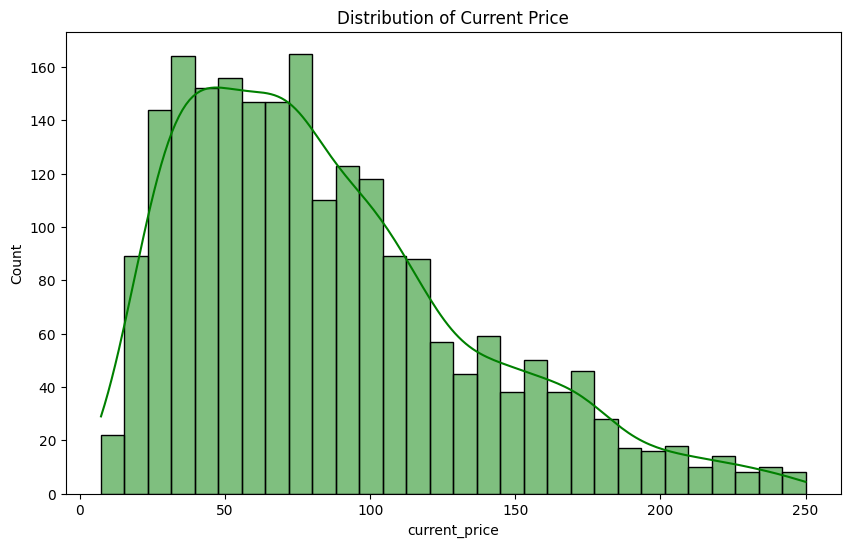

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['current_price'], bins=30, kde=True , color='green')
plt.title('Distribution of Current Price')
plt.show()

/tmp/ipykernel_22994/3400504654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order = df['category'].value_counts().index , palette='viridis',color='red')


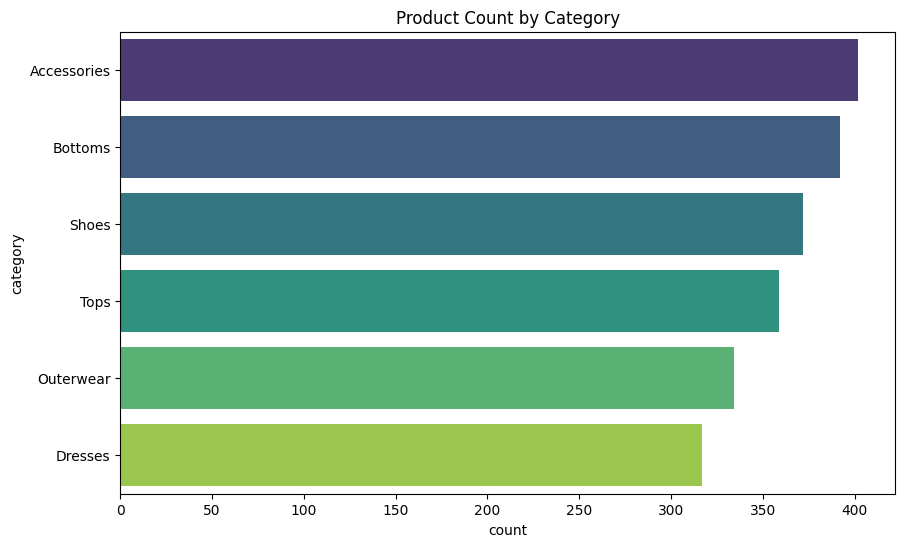

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order = df['category'].value_counts().index , palette='viridis',color='red')
plt.title('Product Count by Category')
plt.show()

/tmp/ipykernel_22994/3661394070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='brand', data=df, order = df['brand'].value_counts().index , palette='coolwarm', color='purple')


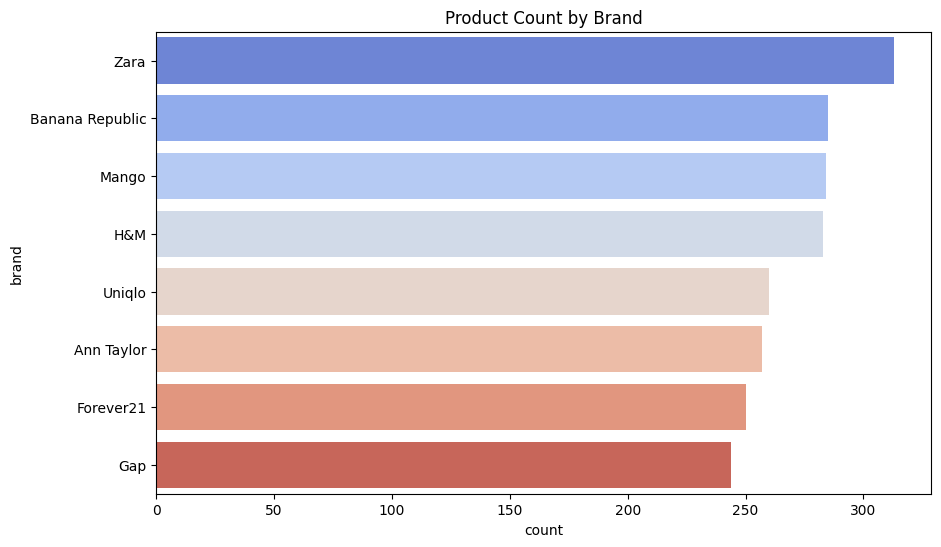

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='brand', data=df, order = df['brand'].value_counts().index , palette='coolwarm', color='purple')
plt.title('Product Count by Brand')
plt.show()

### 3.2. Bivariate Analysis

/tmp/ipykernel_22994/3758687267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='current_price', data=df, palette='Set2', color='orange')


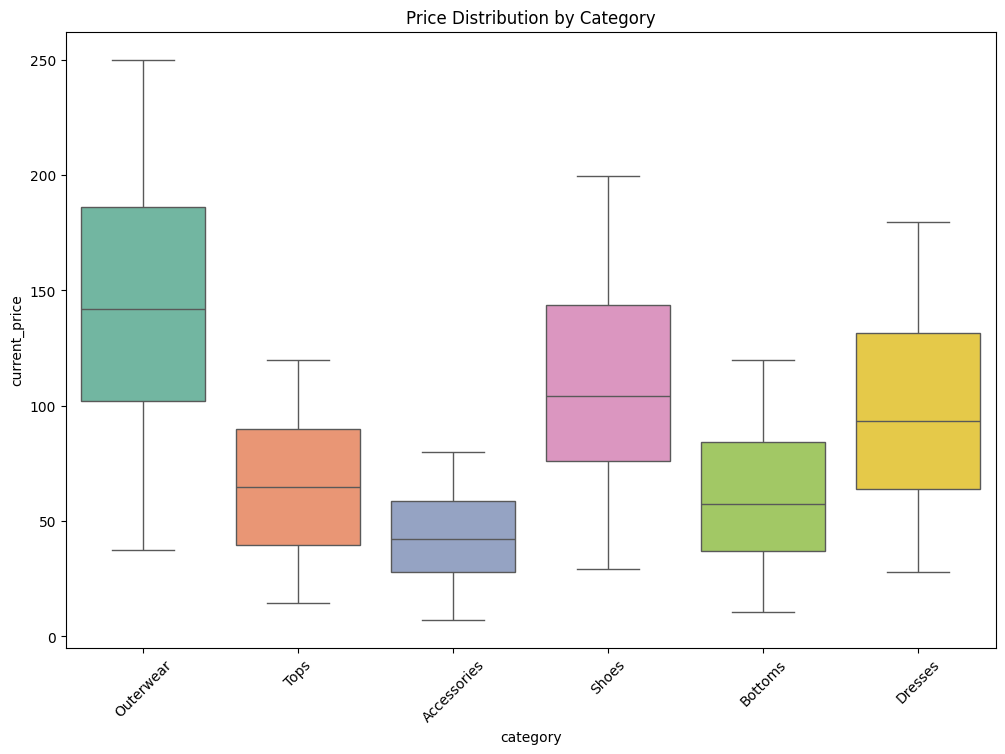

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='current_price', data=df, palette='Set2', color='orange')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_22994/2277066382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='current_price', data=df   , palette='Set1', color='orange')


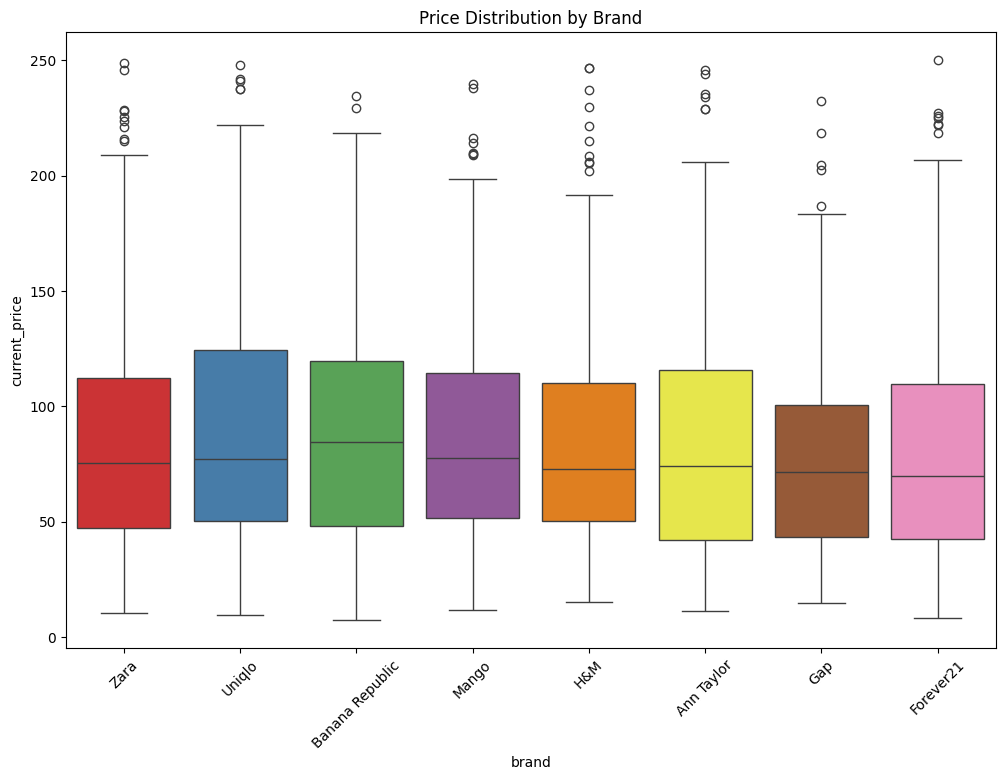

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='current_price', data=df   , palette='Set4', color='orange')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()

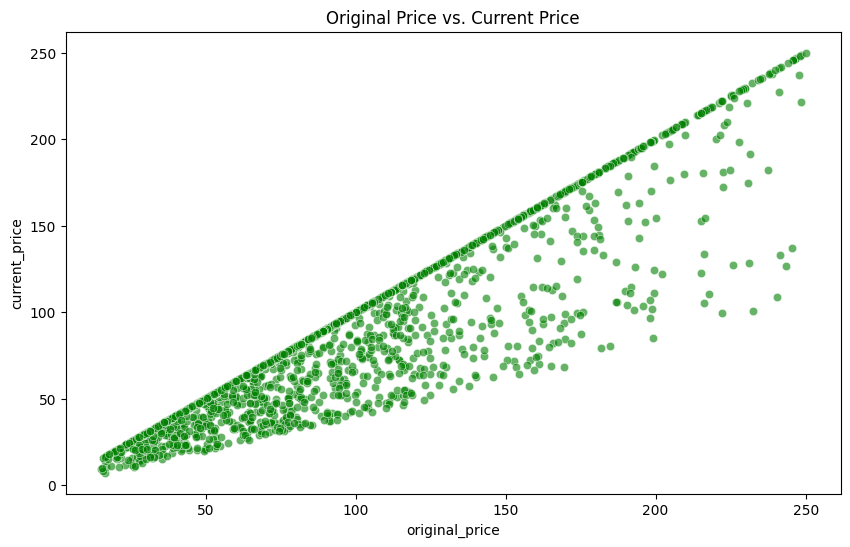

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_price', y='current_price', data=df, color='green' , alpha=0.6)
plt.title('Original Price vs. Current Price')
plt.show()

## 4. Return Analysis

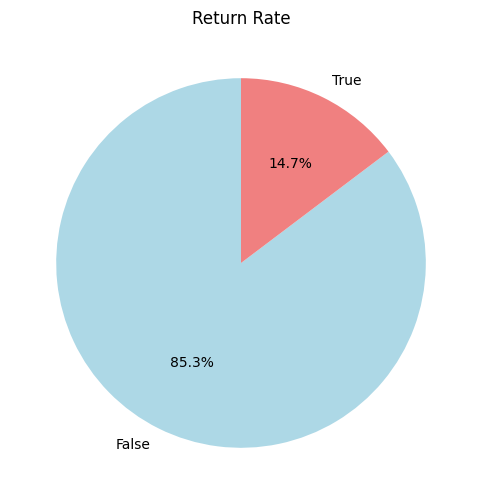

In [12]:
return_counts = df['is_returned'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(return_counts, labels=return_counts.index, autopct='%1.1f%%', startangle=90 , colors=['lightblue', 'lightcoral'])
plt.title('Return Rate')
plt.show()

/tmp/ipykernel_22994/2355802951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='return_reason', data=df[df['is_returned']==True], order = df[df['is_returned']==True]['return_reason'].value_counts().index , palette='pastel', color='orange')


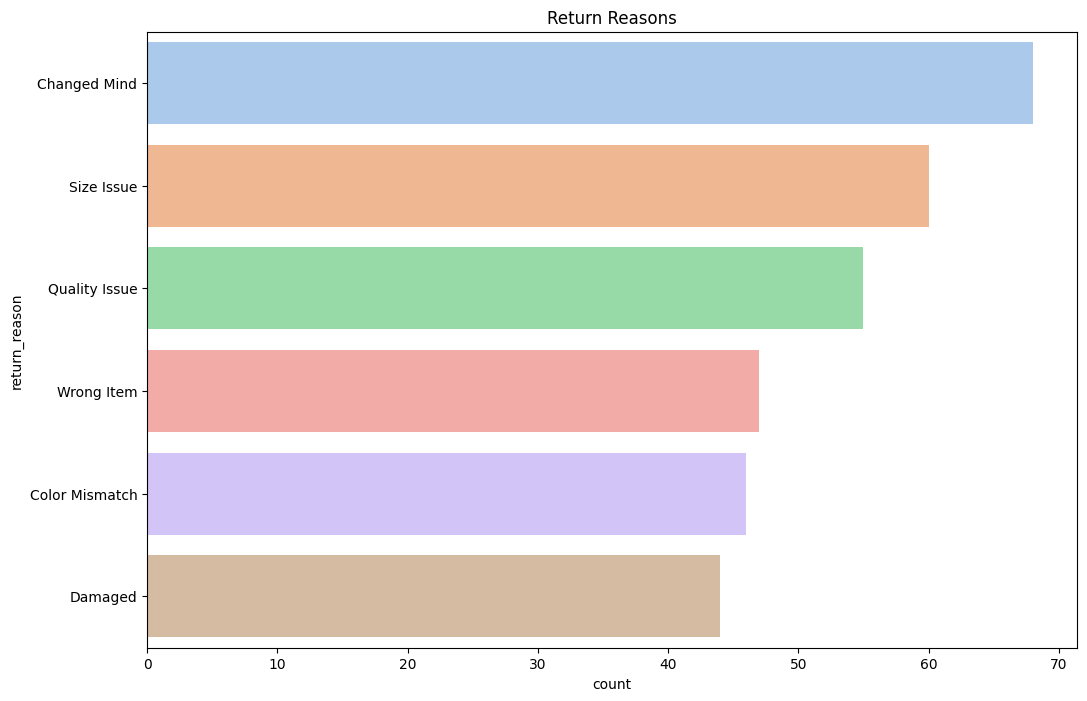

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(y='return_reason', data=df[df['is_returned']==True], order = df[df['is_returned']==True]['return_reason'].value_counts().index , palette='pastel', color='orange')
plt.title('Return Reasons')
plt.show()

## 5. Key Findings

- **Pricing:** The prices of products vary significantly across different categories and brands. Outerwear and Shoes tend to have higher prices.
- **Brands:** Zara and H&M are the most frequent brands in the dataset.
- **Returns:** A significant portion of products are returned. The most common reasons for returns are 'Size Issue', 'Changed Mind', and 'Quality Issue'. This suggests that providing more accurate size guides and improving product quality could reduce return rates.